## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [29]:

# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "/workspaces/TeamCPH/pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (7627, 20)
Loaded Validation features dimensions: (2179, 20)
Loaded Test features dimensions: (1090, 20)

Loaded Training labels dimensions: (7627, 1)
Loaded Validation labels dimensions: (2179, 1)
Loaded Test labels dimensions: (1090, 1)

First few rows of loaded training features:
   Holiday  NextDayHoliday  IsWeekend  Month  KielerWeek  IsNewYearsEve  \
0        0               0          0      1           0              0   
1        1               1          0      4           0              0   
2        0               0          0      4           0              0   
3        1               1          0      4           0              0   
4        0               0          0      7           0              0   

   IsHalloween     t      lag_1  roll7_mean  roll28_mean  year_sin1  \
0            0   552   749.1651    849.2975    1077.8706  -0.273845   
1            0   285  1181.2426   1186.8625    1086.2120  -0.966618   
2            0 

## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339 (1.32 KB)

 Trainable params: 299 (1.17 KB)

 Non-trainable params: 40 (160.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [31]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20


239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53513.9180 - val_loss: 51124.1953
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33545.4375 - val_loss: 16674.3789
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12380.0840 - val_loss: 10045.1592
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8680.1367 - val_loss: 7433.4609
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6892.3711 - val_loss: 6359.5303
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6368.0142 - val_loss: 5731.4067
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5846.0215 - val_loss: 5356.1274
Epoch 8/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5741.1489 - val_loss: 5081.0190
Epoch 9/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5327.7446 - val_loss: 4952.1230
Epoch 10/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5321.6079 - val_loss: 4783.1621
Epoch 11/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5073.0562 - val_loss: 4

## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [32]:
model.save("python_model.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

Note: you may need to restart the kernel to use updated packages.


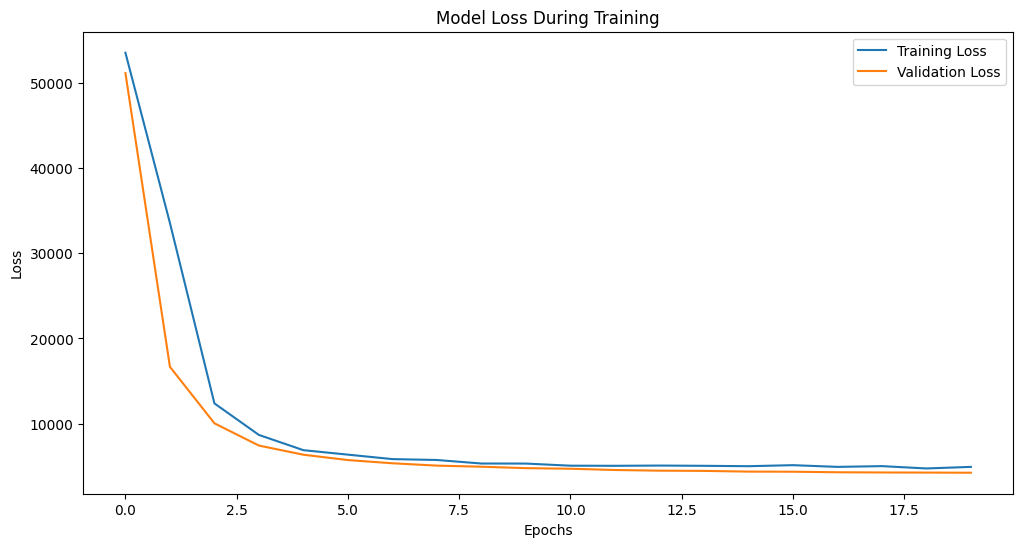

In [33]:
%pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [34]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


  1/239 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
MAPE on the Training Data: 26.90%
MAPE on the Validation Data: 27.14%


In [35]:
import numpy as np
import pandas as pd

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true).reshape(-1), np.array(y_pred).reshape(-1)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

def mape_by_product_category(features_df, y_true, y_pred, product_cols=None):
    """
    Computes MAPE per product category given:
      - features_df: dataframe containing one-hot product columns
      - y_true: actual labels
      - y_pred: predictions
    Assumes baseline category = rows where all product_cols are 0
    """
    if product_cols is None:
        product_cols = [c for c in features_df.columns if c.startswith("Product_")]

    # Ensure 1D arrays
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)

    results = []

    # Baseline product (all zeros in one-hot columns)
    baseline_mask = (features_df[product_cols].sum(axis=1) == 0)
    if baseline_mask.any():
        results.append({
            "ProductCategory": "Product_1 (baseline)",
            "n": int(baseline_mask.sum()),
            "MAPE_%": mape(y_true[baseline_mask], y_pred[baseline_mask])
        })

    # One-hot product categories
    for col in product_cols:
        mask = features_df[col] == 1
        if mask.any():
            results.append({
                "ProductCategory": col,
                "n": int(mask.sum()),
                "MAPE_%": mape(y_true[mask], y_pred[mask])
            })

    return pd.DataFrame(results).sort_values("MAPE_%")


In [36]:
mape_per_product_val = mape_by_product_category(
    validation_features,
    validation_labels,
    validation_predictions
)

print(mape_per_product_val)


        ProductCategory    n      MAPE_%
4             Product_5  335   15.515282
1             Product_2  379   18.149604
2             Product_3  361   24.086659
3             Product_4  385   28.494949
0  Product_1 (baseline)  348   37.484250
5             Product_6  371  103.692265


## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


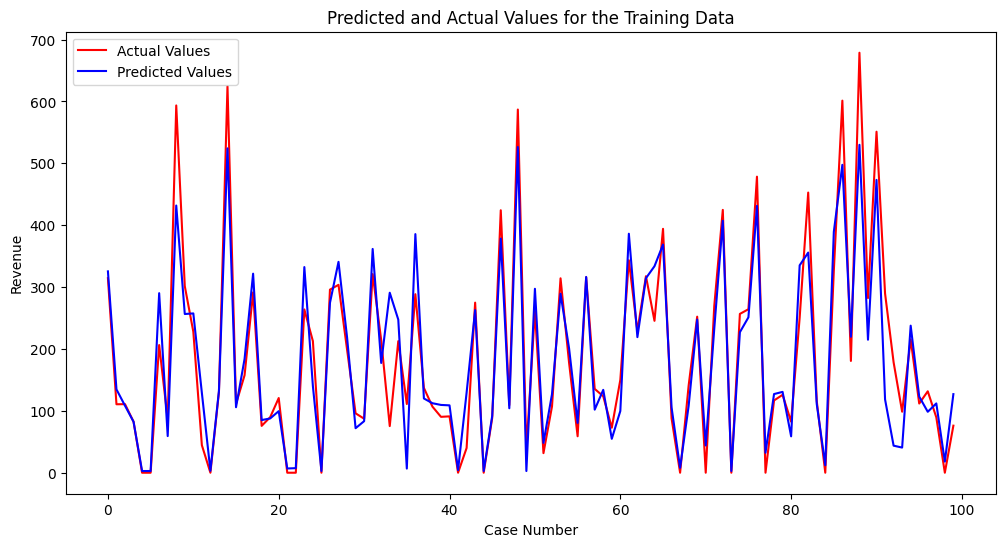

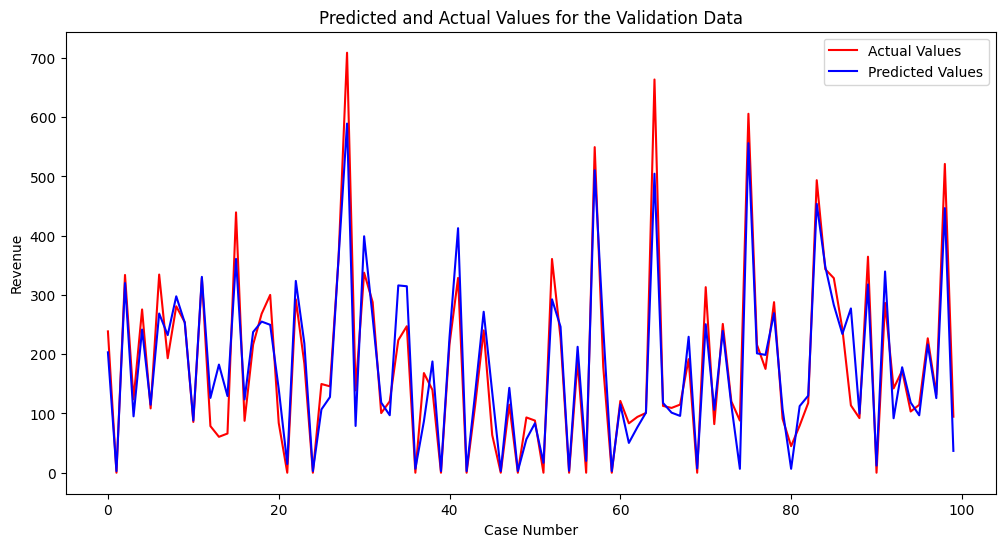

In [37]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')